In [ ]:
!apt-get -qq install texlive-xetex
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!pip install pandas numpy openpyxl

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.17_all.deb ...
Unpacking tex-common (6.17) ...
Selecting previously unselected package fonts-urw-base35.
Preparing to unpack .../04-fonts-urw-base35_20200910-1_all.deb ...
Unpacking fonts-urw-base35 (20200910-1) ...
Selecting previously unselected package libgs9-co

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de sampleo [Hz]
fs = 3000

# Leer el archivo de Excel
archivo_excel = '/content/drive/Othercomputers/Mi Portátil/MyDrive/PublicacionesRepositorio/InvestigacionFruccioMasch/FruccioMasch/20 a 100 Hz 3000Fs/data.xlsx'  # Cambia 'ruta/del/archivo.xlsx' por la ruta de tu archivo Excel
hojas = pd.read_excel(archivo_excel, sheet_name=None)

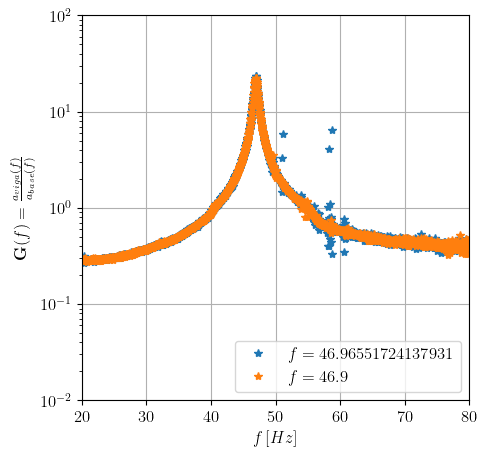

In [ ]:
# Frecuencias de inspeccion
f_min = 20
f_max = 80
# Leer las señales de las dos hojas
hoja1 = hojas['data_0']
hoja2 = hojas['data_1']

# Extraer las columnas de tiempo y voltaje para ambas hojas
tiempo1 = hoja1.iloc[:, 0].values
excitacion_1 = hoja1.iloc[:, 1].values
viga_1 = hoja1.iloc[:, 2].values
base_1 = hoja1.iloc[:, 3].values

tiempo2 = hoja2.iloc[:, 0].values
excitacion_2 = hoja2.iloc[:, 1].values
viga_2 = hoja2.iloc[:, 2].values
base_2 = hoja2.iloc[:, 3].values

# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_1 = np.fft.fft(viga_1)
dft_viga_1_frecuencias = np.fft.fftfreq(len(viga_1), 1/fs)
dft_base_1 = np.fft.fft(base_1)
dft_base_1_frecuencias = np.fft.fftfreq(len(base_1), 1/fs)
frecuencias_1 = dft_base_1_frecuencias[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
G_1 = np.abs(dft_viga_1/dft_base_1)
G_1_restringido = G_1[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
frec_resonancia_1 = frecuencias_1[np.argmax(G_1_restringido)]
# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_2 = np.fft.fft(viga_2)
dft_viga_2_frecuencias = np.fft.fftfreq(len(viga_2), 1/fs)
dft_base_2 = np.fft.fft(base_2)
dft_base_2_frecuencias = np.fft.fftfreq(len(base_2), 1/fs)
frecuencias_2 = dft_base_2_frecuencias[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
G_2 = np.abs(dft_viga_2/dft_base_2)
G_2_restringido = G_2[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
frec_resonancia_2 = frecuencias_2[np.argmax(G_2_restringido)]
# Gráficos de las DFTs
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12
})
plt.figure(figsize=(5, 5))
plt.plot(frecuencias_1 ,G_1_restringido ,'*', label= f'$f={frec_resonancia_1}$')
plt.plot(frecuencias_2 ,G_2_restringido ,'*', label= f'$f={frec_resonancia_2}$')
#plt.title('Funcion tranferencia ')
plt.xlabel(r'$f\, [Hz]$')
plt.ylabel(r'$\mathbf{G}(f)= \frac{a_{viga}(f)}{a_{base}(f)}$')
plt.yscale('log')
plt.xlim(f_min, f_max)
plt.ylim(0.01,100)
plt.legend(loc='lower right')


plt.grid()
plt.show()


In [ ]:

# Leer el archivo de Excel
archivo_excel = '/content/drive/Othercomputers/Mi Portátil/MyDrive/PublicacionesRepositorio/InvestigacionFruccioMasch/FruccioMasch/4 a 15 hz 3000 Fs/data.xlsx'  # Cambia 'ruta/del/archivo.xlsx' por la ruta de tu archivo Excel
hojas = pd.read_excel(archivo_excel, sheet_name=None)

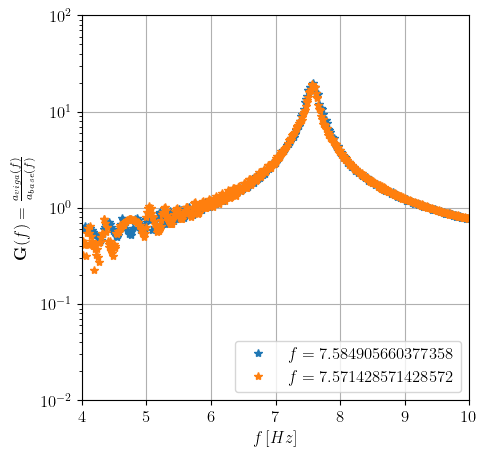

In [ ]:
# Frecuencias de inspeccion
f_min = 4
f_max = 10
# Leer las señales de las dos hojas
hoja1 = hojas['data_0']
hoja2 = hojas['data_1']

# Extraer las columnas de tiempo y voltaje para ambas hojas
tiempo1 = hoja1.iloc[:, 0].values
excitacion_1 = hoja1.iloc[:, 1].values
viga_1 = hoja1.iloc[:, 2].values
base_1 = hoja1.iloc[:, 3].values

tiempo2 = hoja2.iloc[:, 0].values
excitacion_2 = hoja2.iloc[:, 1].values
viga_2 = hoja2.iloc[:, 2].values
base_2 = hoja2.iloc[:, 3].values

# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_1 = np.fft.fft(viga_1)
dft_viga_1_frecuencias = np.fft.fftfreq(len(viga_1), 1/fs)
dft_base_1 = np.fft.fft(base_1)
dft_base_1_frecuencias = np.fft.fftfreq(len(base_1), 1/fs)
frecuencias_1 = dft_base_1_frecuencias[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
G_1 = np.abs(dft_viga_1/dft_base_1)
G_1_restringido = G_1[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
frec_resonancia_1 = frecuencias_1[np.argmax(G_1_restringido)]
# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_2 = np.fft.fft(viga_2)
dft_viga_2_frecuencias = np.fft.fftfreq(len(viga_2), 1/fs)
dft_base_2 = np.fft.fft(base_2)
dft_base_2_frecuencias = np.fft.fftfreq(len(base_2), 1/fs)
frecuencias_2 = dft_base_2_frecuencias[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
G_2 = np.abs(dft_viga_2/dft_base_2)
G_2_restringido = G_2[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
frec_resonancia_2 = frecuencias_2[np.argmax(G_2_restringido)]
# Gráficos de las DFTs
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12
})
plt.figure(figsize=(5, 5))
plt.plot(frecuencias_1 ,G_1_restringido ,'*', label= f'$f={frec_resonancia_1}$')
plt.plot(frecuencias_2 ,G_2_restringido ,'*', label= f'$f={frec_resonancia_2}$')
#plt.title('Funcion tranferencia ')
plt.xlabel(r'$f\, [Hz]$')
plt.ylabel(r'$\mathbf{G}(f)= \frac{a_{viga}(f)}{a_{base}(f)}$')
plt.yscale('log')
plt.xlim(f_min, f_max)
plt.ylim(0.01,100)
plt.legend(loc='lower right')


plt.grid()
plt.show()

In [ ]:
# Leer el archivo de Excel
archivo_excel = '/content/drive/Othercomputers/Mi Portátil/MyDrive/PublicacionesRepositorio/InvestigacionFruccioMasch/FruccioMasch/80 a 160 Hz 3000 Fs/data.xlsx'  # Cambia 'ruta/del/archivo.xlsx' por la ruta de tu archivo Excel
hojas = pd.read_excel(archivo_excel, sheet_name=None)

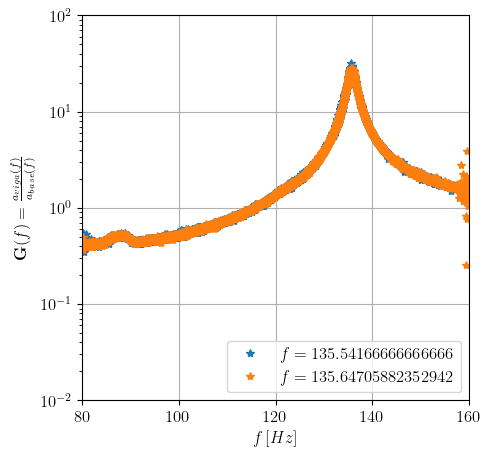

In [ ]:
# Frecuencias de inspeccion
f_min = 80
f_max = 160
# Leer las señales de las dos hojas
hoja1 = hojas['data_0']
hoja2 = hojas['data_1']

# Extraer las columnas de tiempo y voltaje para ambas hojas
tiempo1 = hoja1.iloc[:, 0].values
excitacion_1 = hoja1.iloc[:, 1].values
viga_1 = hoja1.iloc[:, 2].values
base_1 = hoja1.iloc[:, 3].values

tiempo2 = hoja2.iloc[:, 0].values
excitacion_2 = hoja2.iloc[:, 1].values
viga_2 = hoja2.iloc[:, 2].values
base_2 = hoja2.iloc[:, 3].values

# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_1 = np.fft.fft(viga_1)
dft_viga_1_frecuencias = np.fft.fftfreq(len(viga_1), 1/fs)
dft_base_1 = np.fft.fft(base_1)
dft_base_1_frecuencias = np.fft.fftfreq(len(base_1), 1/fs)
frecuencias_1 = dft_base_1_frecuencias[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
G_1 = np.abs(dft_viga_1/dft_base_1)
G_1_restringido = G_1[np.where((dft_base_1_frecuencias > f_min)& (dft_base_1_frecuencias < f_max))]
frec_resonancia_1 = frecuencias_1[np.argmax(G_1_restringido)]
# Computar la Transformada de Fourier Discreta (DFT)del acelerometro base y viga hoja 1
dft_viga_2 = np.fft.fft(viga_2)
dft_viga_2_frecuencias = np.fft.fftfreq(len(viga_2), 1/fs)
dft_base_2 = np.fft.fft(base_2)
dft_base_2_frecuencias = np.fft.fftfreq(len(base_2), 1/fs)
frecuencias_2 = dft_base_2_frecuencias[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
G_2 = np.abs(dft_viga_2/dft_base_2)
G_2_restringido = G_2[np.where((dft_base_2_frecuencias > f_min)& (dft_base_2_frecuencias < f_max))]
frec_resonancia_2 = frecuencias_2[np.argmax(G_2_restringido)]
# Gráficos de las DFTs
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12
})
plt.figure(figsize=(5, 5))
plt.plot(frecuencias_1 ,G_1_restringido ,'*', label= f'$f={frec_resonancia_1}$')
plt.plot(frecuencias_2 ,G_2_restringido ,'*', label= f'$f={frec_resonancia_2}$')
#plt.title('Funcion tranferencia ')
plt.xlabel(r'$f\, [Hz]$')
plt.ylabel(r'$\mathbf{G}(f)= \frac{a_{viga}(f)}{a_{base}(f)}$')
plt.yscale('log')
plt.xlim(f_min, f_max)
plt.ylim(0.01,100)
plt.legend(loc='lower right')


plt.grid()
plt.show()